**Проектная работа. Анализ бизнес-показателей**

**Описание проекта**


**Procrastinate Pro+** - это развлекательное приложение. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

**Задача** — разобраться в причинах и помочь компании выйти в плюс.


Данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

* лог сервера с данными об их посещениях,

* выгрузка их покупок за этот период,

* рекламные расходы.


Предстоит изучить:

* откуда приходят пользователи и какими устройствами они пользуются,

* сколько стоит привлечение пользователей из различных рекламных каналов;

* сколько денег приносит каждый клиент,

* когда расходы на привлечение клиента окупаются,

* какие факторы мешают привлечению клиентов.

### Загрузка данных и подготовка их к анализу

#### Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
import pathlib
from pathlib import Path
from datetime import datetime, timedelta


#### Предварительная обработка данных

По каждому датасету выведу несколько строк, что бы ознакомиться с представлением данных

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
visits_data.sample(10)

,User Id,Region,Device,Channel,Session Start,Session End
126215,486403818863,United States,iPhone,TipTop,2019-08-29 22:13:53,2019-08-29 22:47:45
258914,683495103840,Germany,iPhone,OppleCreativeMedia,2019-08-10 04:28:28,2019-08-10 04:36:29
1714,105500725239,United States,Mac,organic,2019-05-03 18:51:50,2019-05-03 18:56:43
134349,169562852515,United States,iPhone,TipTop,2019-09-05 20:19:26,2019-09-05 20:58:50
133353,180479542115,United States,iPhone,TipTop,2019-09-04 14:01:15,2019-09-04 14:17:19
22066,614953253091,United States,iPhone,YRabbit,2019-05-23 01:47:57,2019-05-23 02:41:15
293164,4944831863,Germany,Android,lambdaMediaAds,2019-10-04 15:05:12,2019-10-04 15:30:15
170065,104125689916,United States,Mac,organic,2019-10-02 02:47:04,2019-10-02 02:47:30
84479,888359258755,United States,Android,FaceBoom,2019-07-24 02:54:32,2019-07-24 03:13:00
305278,543263186602,UK,Android,AdNonSense,2019-10-22 08:19:30,2019-10-22 10:34:32


Приведу названия столбцов к змеиному регистру

In [ ]:
visits_data.rename(columns = {'User Id': 'user_id', 'Region': 'region', 'Device': 'device', 'Channel': 'channel', 'Session Start': 'session_start', 'Session End': 'session_end'}, inplace = True)

In [ ]:
orders_data.sample(10)

,User Id,Event Dt,Revenue
20460,124878761232,2019-09-27 06:09:27,4.99
5275,867053230746,2019-06-28 00:16:46,4.99
39674,598846606444,2019-10-26 13:58:33,4.99
21414,980643549359,2019-10-01 23:37:19,4.99
850,270745921153,2019-05-17 16:34:51,4.99
13138,846533881021,2019-08-18 00:31:51,4.99
21798,283310085522,2019-10-03 15:23:51,4.99
4110,113988190130,2019-06-19 11:30:12,4.99
21679,448642808960,2019-10-02 02:25:59,4.99
19556,767166987419,2019-09-23 19:46:51,4.99


In [ ]:
orders_data.rename(columns = {'User Id': 'user_id', 'Event Dt': 'event_dt', 'Revenue': 'revenue'}, inplace = True)

In [ ]:
costs_data.sample(10)

,dt,Channel,costs
188,2019-05-09,MediaTornado,6.72
1392,2019-09-10,OppleCreativeMedia,9.75
850,2019-09-08,YRabbit,3.36
638,2019-08-07,TipTop,318.00
1600,2019-10-08,WahooNetBanner,31.80
1791,2019-10-19,lambdaMediaAds,5.60
253,2019-07-13,MediaTornado,4.80
57,2019-06-27,FaceBoom,227.70
1115,2019-06-05,LeapBob,9.03
1008,2019-08-17,AdNonSense,14.70


In [ ]:
costs_data.rename(columns = {'Channel': 'channel'}, inplace = True)

**Описание данных**

Файл visits_info_short.csv — хранит лог сервера с информацией о посещениях сайта

* user_id — уникальный идентификатор пользователя,
* region — страна пользователя,
* device — тип устройства пользователя,
* channel — идентификатор источника перехода,
* session_start — дата и время начала сессии,
* session_end — дата и время окончания сессии.

Файл orders_info_short.csv
* user_id — уникальный идентификатор пользователя,
* event_dt — дата и время покупки,
* revenue — сумма заказа.


Файл costs_info_short.csv
* dt — дата проведения рекламной кампании,
* channel — идентификатор рекламного источника,
* costs — расходы на эту кампанию.

Изучу типы данных

In [ ]:
visits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


В столбцах session_start и session_end приведу данные к типу datetime

In [ ]:
visits_data['session_start'] = pd.to_datetime(visits_data['session_start'])

In [ ]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


В столбце event_dt приведу данные к типу datetime

In [ ]:
orders_data['event_dt'] = pd.to_datetime(orders_data['event_dt'])

In [ ]:
costs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В столбце dt приведу данные к типу datetime

In [ ]:
costs_data['dt'] = pd.to_datetime(costs_data['dt']).dt.date

In [ ]:
costs_data.sample(10)

,dt,channel,costs
1510,2019-07-10,WahooNetBanner,21.00
774,2019-06-24,YRabbit,4.14
1639,2019-05-20,lambdaMediaAds,14.40
281,2019-08-10,MediaTornado,3.84
1276,2019-05-17,OppleCreativeMedia,4.25
1442,2019-05-03,WahooNetBanner,8.40
1275,2019-05-16,OppleCreativeMedia,3.00
247,2019-07-07,MediaTornado,4.08
1048,2019-09-26,AdNonSense,34.65
733,2019-05-14,YRabbit,9.00


Проверю датасеты на дубликаты

In [ ]:
visits_data.duplicated().sum()

0

In [ ]:
orders_data.duplicated().sum()

0

In [ ]:
costs_data.duplicated().sum()

0

Явных дублей нет

Изучу уникальные значения

In [ ]:
visits_data.nunique(axis=0)

user_id          150008
region                4
device                4
channel              11
session_start    306813
session_end      306793
dtype: int64

In [ ]:
visits_data['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [ ]:
visits_data['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [ ]:
visits_data['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [ ]:
orders_data.nunique(axis=0)

user_id      8881
event_dt    40163
revenue         5
dtype: int64

In [ ]:
costs_data.nunique(axis=0)

dt         180
channel     10
costs      608
dtype: int64

In [ ]:
costs_data['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Неявных дублей нет

Проверю датасеты на наличие пропусков

In [ ]:
visits_data.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [ ]:
orders_data.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [ ]:
costs_data.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

Пропусков нет

**Вывод**

* Названия столбцов приведены к змеиному регистру
* Изменены типы данных для дат
* Дубли не обнаружены

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии.


Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Функция get_profiles()

In [ ]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


Функция get_retention()

In [ ]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Функция get_conversion()

In [ ]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Функция get_ltv()

In [ ]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC,
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Функция filter_data()

In [ ]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

Функция plot_retention()

In [ ]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Liftime')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Liftime')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

Функция plot_conversion()

In [ ]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Liftime')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Функция plot_ltv_roi

In [ ]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Liftime')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Liftime')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Вывод**

Заданы функции:
* для вычисления значений метрик
* для построения графиков


### Исследовательский анализ данных

- Составление профилей пользователей. Определение минимальной и максимальной даты привлечения пользователей.
- Из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построение таблицы, отражающей количество пользователей и долю платящих из каждой страны.
- Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построение таблицы, отражающей количество пользователей и долю платящих для каждого устройства.
- Изучиние рекламных источников привлечения и определение каналов, из которых пришло больше всего платящих пользователей. Построение таблицы, отражающей количество пользователей и долю платящих для каждого канала привлечения.



#### Профили пользователей

Для составления профилей пользователй вызову функцию get_profiles(), передав ей данные о посещениях, покупках, событиях и рекламных расходах в приложении Procrastinate Pro+.

In [ ]:
profiles = get_profiles(visits_data, orders_data, ad_costs=costs_data, events=None)
display(profiles.head(10))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


Минимальная и максимальная даты привлечения пользователей

In [ ]:
# доступный интервал привлечения пользователей
min_analysis_date = profiles['dt'].min()
observation_date =  profiles['dt'].max()

print('Самая ранняя дата первого посещения:', min_analysis_date, 'Самая поздняя дата первого посещения(момент анализа):', observation_date)

# горизонт анализа и максимальная дата привлечения
analysis_horizon =14
max_analysis_date = observation_date-timedelta(days=analysis_horizon-1)

print('Максимально возможная дата привлечения для заданного горизонта:', max_analysis_date)

Самая ранняя дата первого посещения: 2019-05-01 Самая поздняя дата первого посещения(момент анализа): 2019-10-27
Максимально возможная дата привлечения для заданного горизонта: 2019-10-14


#### Страны

In [ ]:
profiles.pivot_table(index='region', values=['user_id', 'payer'], aggfunc={"user_id": 'size', "payer": 'sum', "payer": 'mean'}).sort_values(by=['payer'], ascending=False)

,payer,user_id
region,,
United States,0.069019,100002
Germany,0.041119,14981
UK,0.039829,17575
France,0.037994,17450


Самая высокая доля платящих пользователей в США - 6.9%, самая низкая во Франции - 3,79%

#### Устройства

In [ ]:
profiles.pivot_table(index='device', values=['user_id', 'payer'], aggfunc={"user_id": 'size', "payer": 'sum', "payer": 'mean'}).sort_values(by=['payer'], ascending=False)

,payer,user_id
device,,
Mac,0.063644,30042
iPhone,0.062079,54479
Android,0.058518,35032
PC,0.050468,30455


Самая высокая доля платящих пользователей использует Mac - 6.36%, самая низкая PC - 5,05%

#### Рекламные источники

In [ ]:
profiles.pivot_table(index='channel', values=['user_id', 'payer'], aggfunc={"user_id": 'size', "payer": 'sum', "payer": 'mean'}).sort_values(by=['payer'], ascending=False)

,payer,user_id
channel,,
FaceBoom,0.122049,29144
AdNonSense,0.113402,3880
lambdaMediaAds,0.104700,2149
TipTop,0.096007,19561
RocketSuperAds,0.079137,4448
WahooNetBanner,0.052964,8553
YRabbit,0.038265,4312
MediaTornado,0.035747,4364
LeapBob,0.030633,8553


Самая высокая доля платящих пользователей приходит с Faceboom - 12.21%, самая низкая c OppleCreativeMedia  - 2,71%. Есть доля платящих пользователей, которые приходят сами - 2,06%

**Вывод**

Самая высокая доля платящих пользователей:
* в США - 6.9%
* использует Mac - 6.36%
* приходит с Faceboom - 12.21%

### Маркетинг

- Посчитать общую сумму расходов на маркетинг.
- Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построить визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.
- Узнайть, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.


#### Расходы на маркетинг

In [ ]:
costs_data['costs'].sum().round()

105497.0

#### Распределение по рекламным источникам

In [ ]:
costs_data.pivot_table(index='channel', values='costs', aggfunc={"costs": 'sum'}).sort_values(by=['costs'], ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Больше всех расходов пришлось на TipTop, меньше всех - YRabbit

#### Визуализация динамики изменения расходов во времени

In [ ]:
costs_data['week'] = pd.to_datetime(costs_data['dt']).dt.isocalendar().week
costs_data['month'] = pd.to_datetime(costs_data['dt']).dt.month

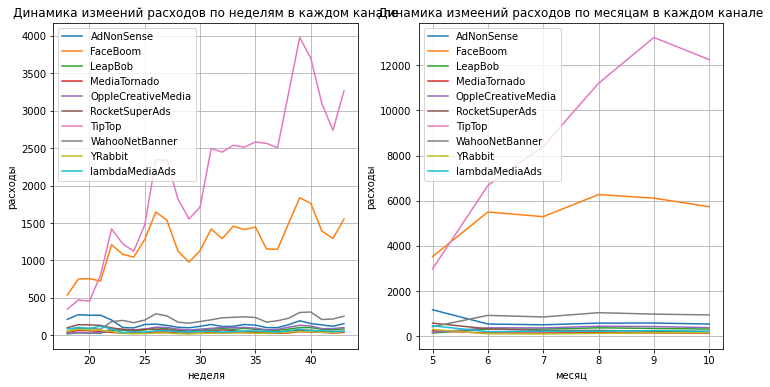

In [ ]:
ax1=plt.subplot(1, 2, 1)
costs_data.pivot_table(index='week', columns='channel', values='costs', aggfunc={"costs": 'sum'}).plot(ax=ax1, figsize=(12, 6), grid=True)
plt.legend()
plt.title('Динамика измеений расходов по неделям в каждом канале')
plt.xlabel('неделя')
plt.ylabel('расходы');

ax2=plt.subplot(1, 2, 2)
costs_data.pivot_table(index='month', columns='channel', values='costs', aggfunc={"costs": 'sum'}).plot(ax=ax2, figsize=(12, 6), grid=True)
plt.legend()
plt.title('Динамика измеений расходов по месяцам в каждом канале')
plt.xlabel('месяц')
plt.ylabel('расходы');

На 21 неделе расходы на TipTop превзошли расходы на FaceBoom. В сентябре произошла коррекция TipTop и FaceBoom, рост замедлился

#### CAC

In [ ]:
profiles.query('channel != "organic"').pivot_table(index='channel', values='acquisition_cost', aggfunc={"acquisition_cost": 'mean'}).sort_values(by=['acquisition_cost'], ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Самый высокий CAC у TipTop - 2,80

In [ ]:
profiles.query('channel != "organic"').acquisition_cost.mean().round(6)

1.127481

Средний CAC 1.13

**Вывод**

* общая сумма расходов на маркетинг - 105 497
* больше всех расходов пришлось на TipTop - 54 751
* в сентябре рост расходов на TipTop и FaceBoom замедлился
* средний CAC - 1.13

### Оценка окупаемость рекламы

Используя графики LTV, ROI и CAC, необходимо провести анализ окупаемости рекламы. Допущение - на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверить конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Построить и изучить графики конверсии и удержания.
- Проанализировать окупаемость рекламы с разбивкой по устройствам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализировать окупаемость рекламы с разбивкой по странам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализировать окупаемость рекламы с разбивкой по рекламным каналам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?



#### Окупаемость рекламы

Изменю момент анализа на 01.11.2019 согласно заданию

In [ ]:
# доступный интервал привлечения пользователей
min_analysis_date = profiles['dt'].min()
observation_date =  datetime(2019, 11, 1).date()
# горизонт анализа и максимальная дата привлечения
analysis_horizon = 14
max_analysis_date = observation_date-timedelta(days=analysis_horizon-1)

print('Максимально возможная дата привлечения для заданного горизонта:', max_analysis_date)

Максимально возможная дата привлечения для заданного горизонта: 2019-10-19


Удалю из датасета органических пользователей

In [ ]:
profiles = profiles.query('channel != "organic"')

In [ ]:
horizon_days = 14  # горизонт анализа

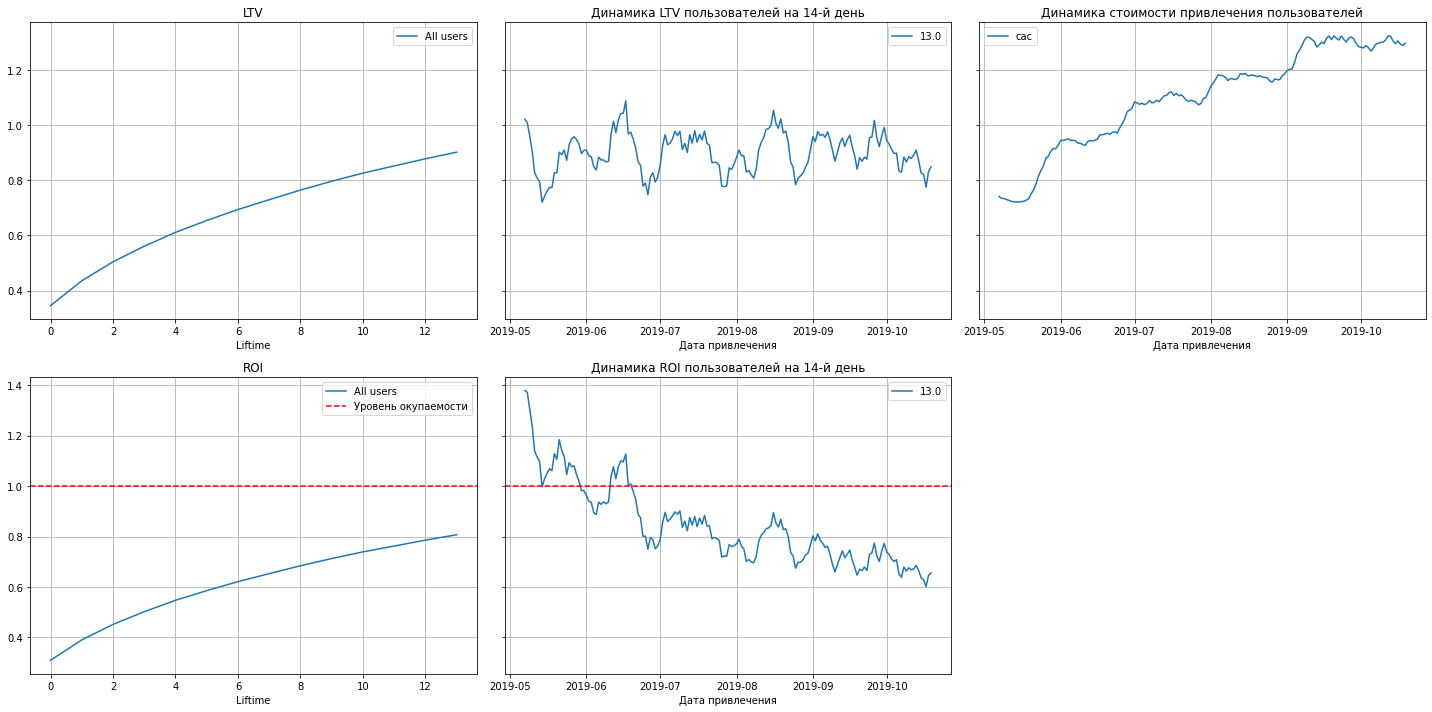

In [ ]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders_data, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)


* LTV в течение двух недель растет, что неплохо, но график с ROI показывает, что окупаемости рекламных расходов за эти две недели не происходит. Инвестиции в рекламу перестали окупаться с серидины июня 2019 года
* В динамике метрика LTV на 14 день показывает волатильность
* CAC достаточно сильно и стабильно растет, возможно рекламный бюджет был увеличен



#### Конверсия и ударжание пользователей и динамика их изменений

Построю графики с конверсий пользователей

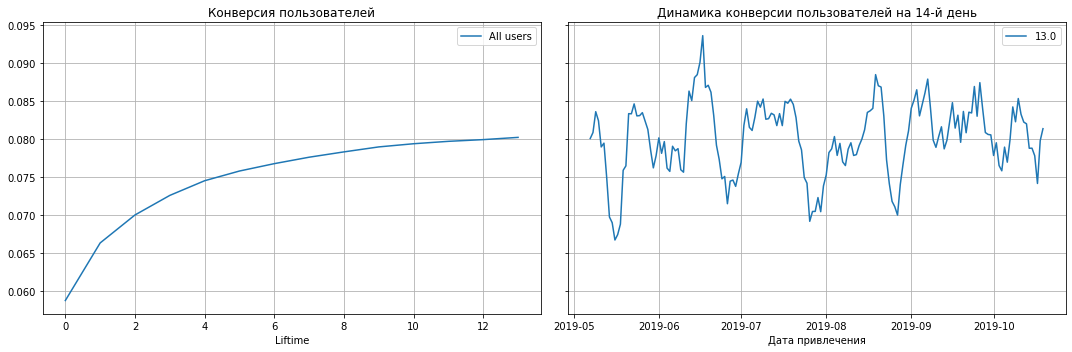

In [ ]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders_data, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пусть и волатильна в краткосрочной перспективе, но показывает постоянность в течение года

Посторою графики с удержанием пользователей

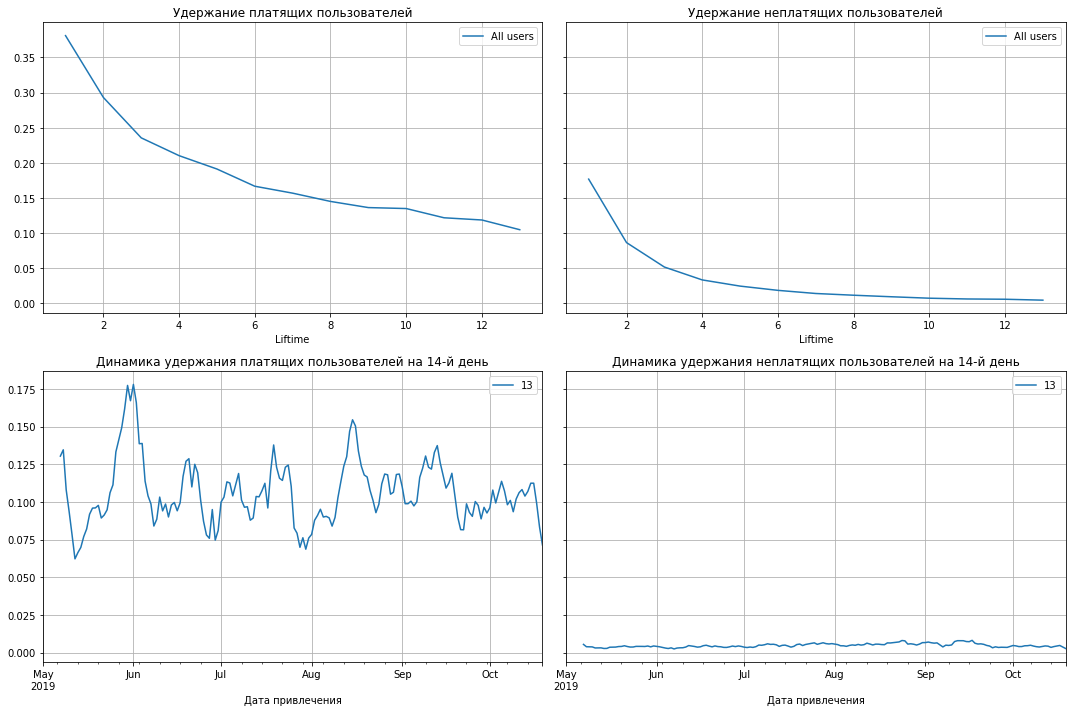

In [ ]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits_data, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платящих пользователй 14-го дня показывет падение на 30%, но в течение года все достаточно стабильно

####  Окупаемость рекламы с разбивкой по устройствам

Построю графики в разрезе устройств

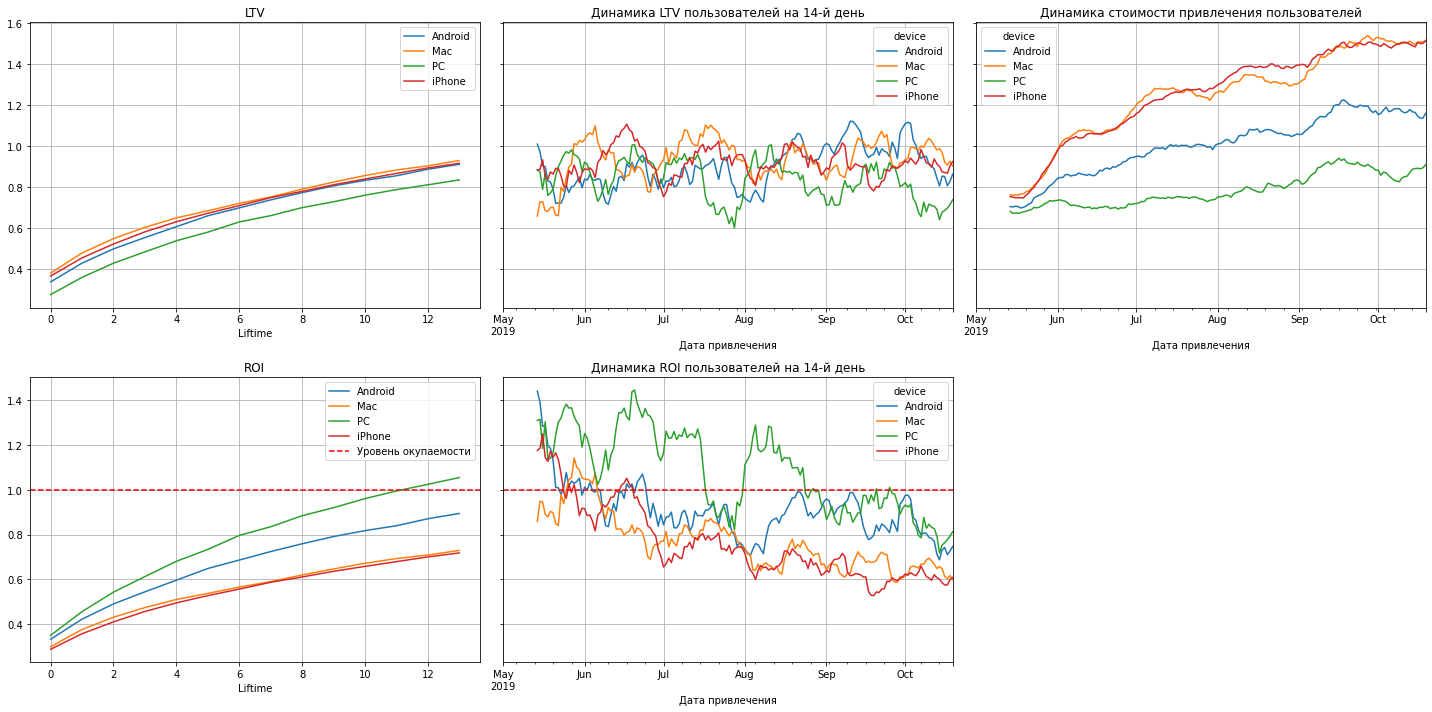

In [ ]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders_data, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

* На графике ROI линия PC пересекла линию окупаемости, значит реклама для пользователей PC окупается, а вот реклама для пользователей Android, Mac и iPhone нет.
* В мае 2019 года не окупалась реклама только для пользователей Mac, но в июле реклама почти для всех устройств стала нерентабельной.
* CAC для PC держится ниже всех.

Построю график с конверсией пользователей

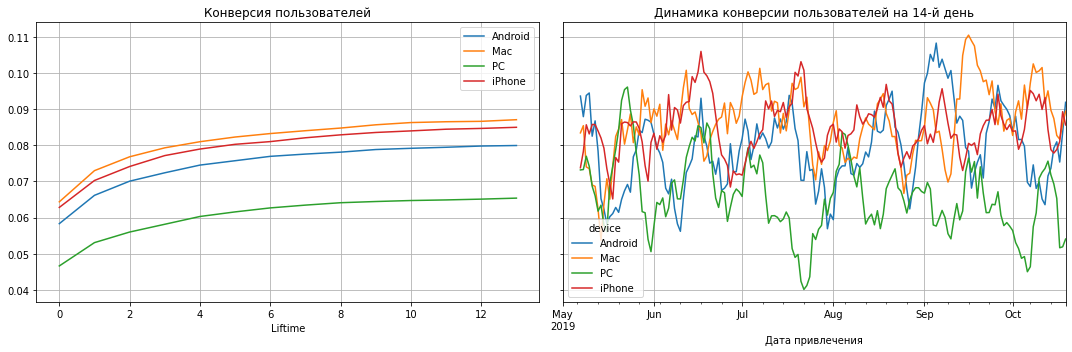

In [ ]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders_data, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Пользователи всех устройств хорошо конвертируются, причем пользователи Mac даже лучше PC. Есть над чем поработать

Построю график с удержанием пользователей

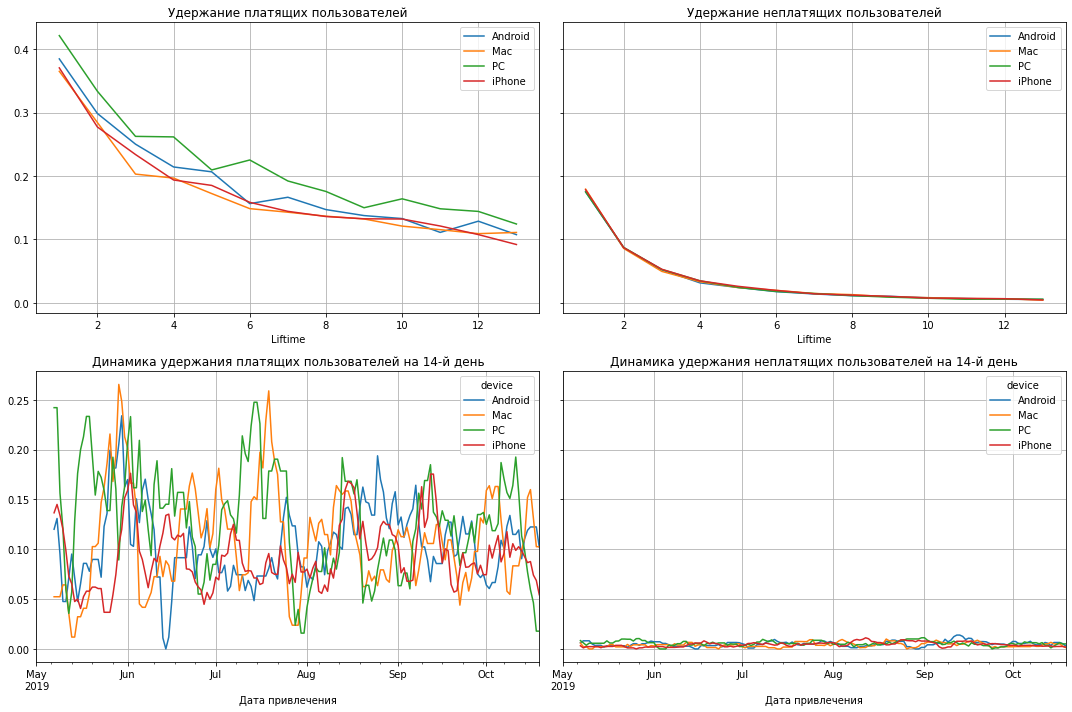

In [ ]:
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits_data, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание пользователей всех устройств очень схоже, без аномалий

#### Окупаемость рекламы с разбивкой по странам

Построю графики в разрезе стран

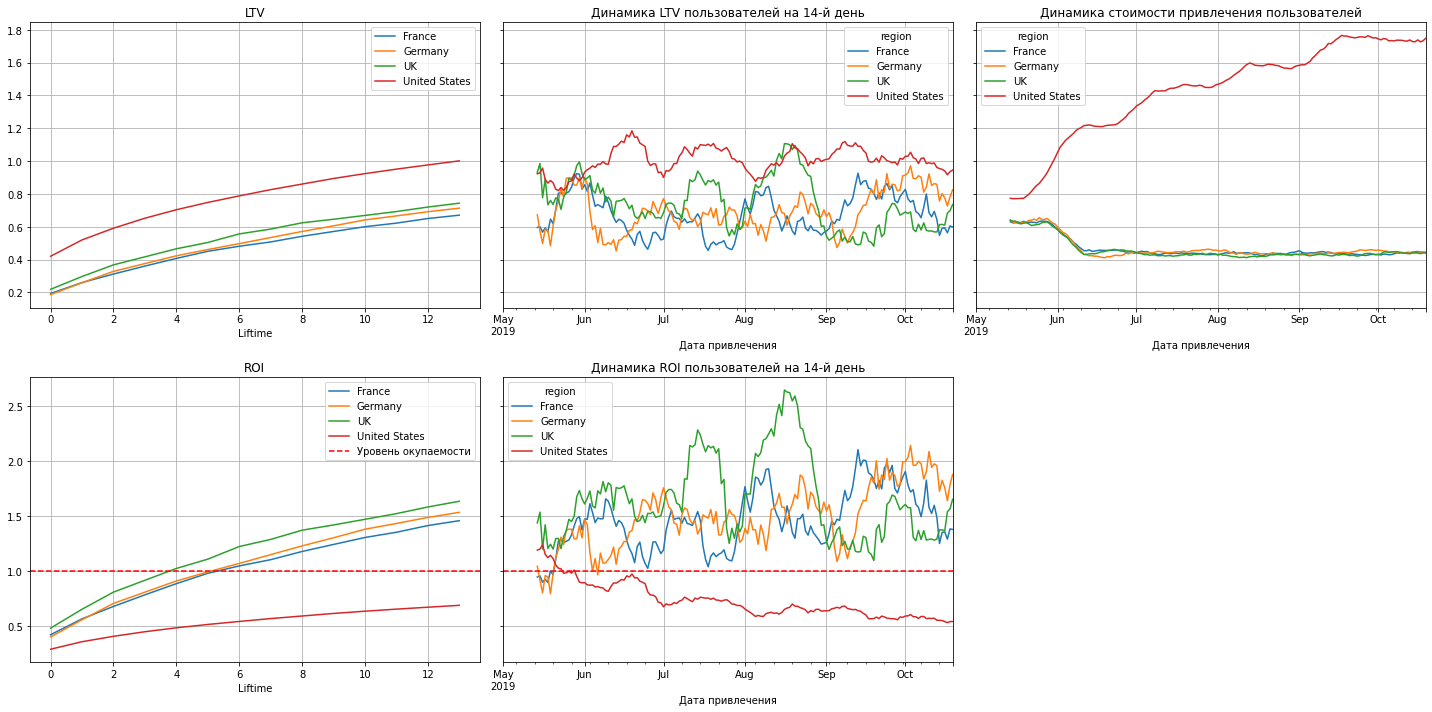

In [ ]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders_data, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

* Реклама таргетированная на пользователей из США не окупается.
* CAC таких пользователей в разы дороже всех остальных.
* В середине мая 2019 года картина была иной - не окупалась реклама на пользователей из Франции и Великобритании, а CAC был почти на одном уровне.

Построю график с конверсией пользователей

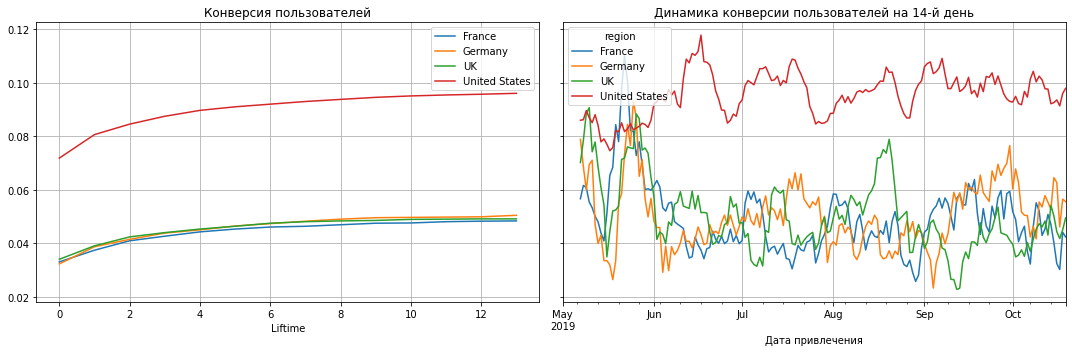

In [ ]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders_data, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Пользователи из США показывают высокую конверсию.

Построю график с удержанием пользователей

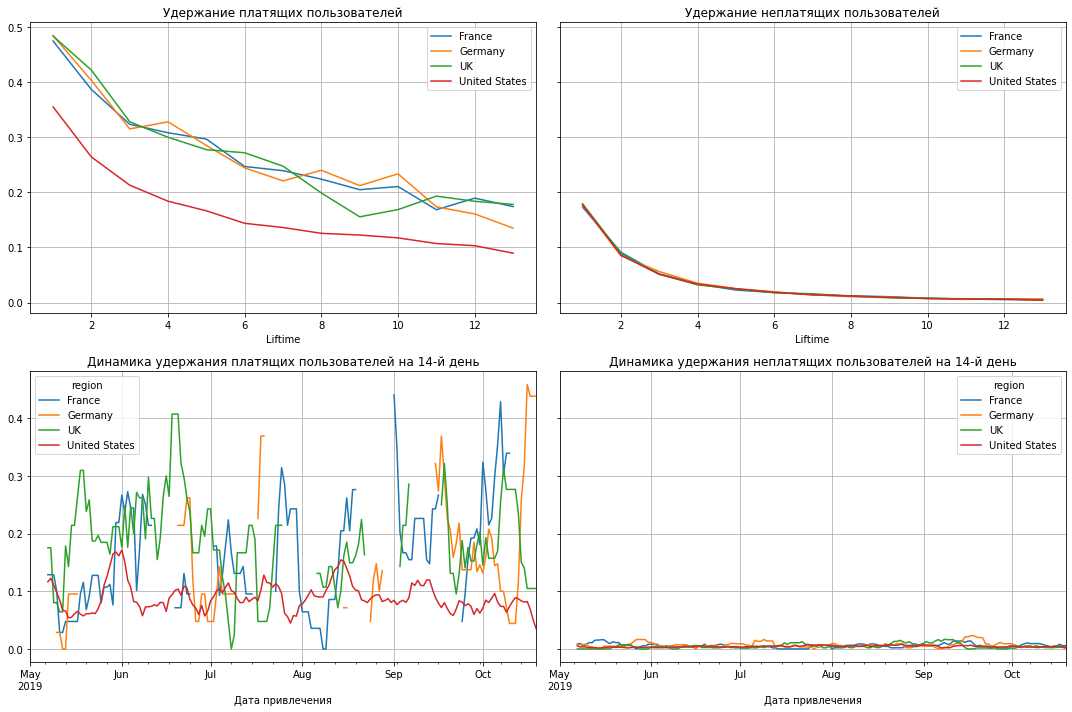

In [ ]:
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits_data, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание 14-го дня для пользователей из США хуже всех остальных. В динамике также проседает в сравнение с другими.

#### Окупаемость рекламы с разбивкой по рекламным каналам

Построю графики в разрезе рекламных каналов

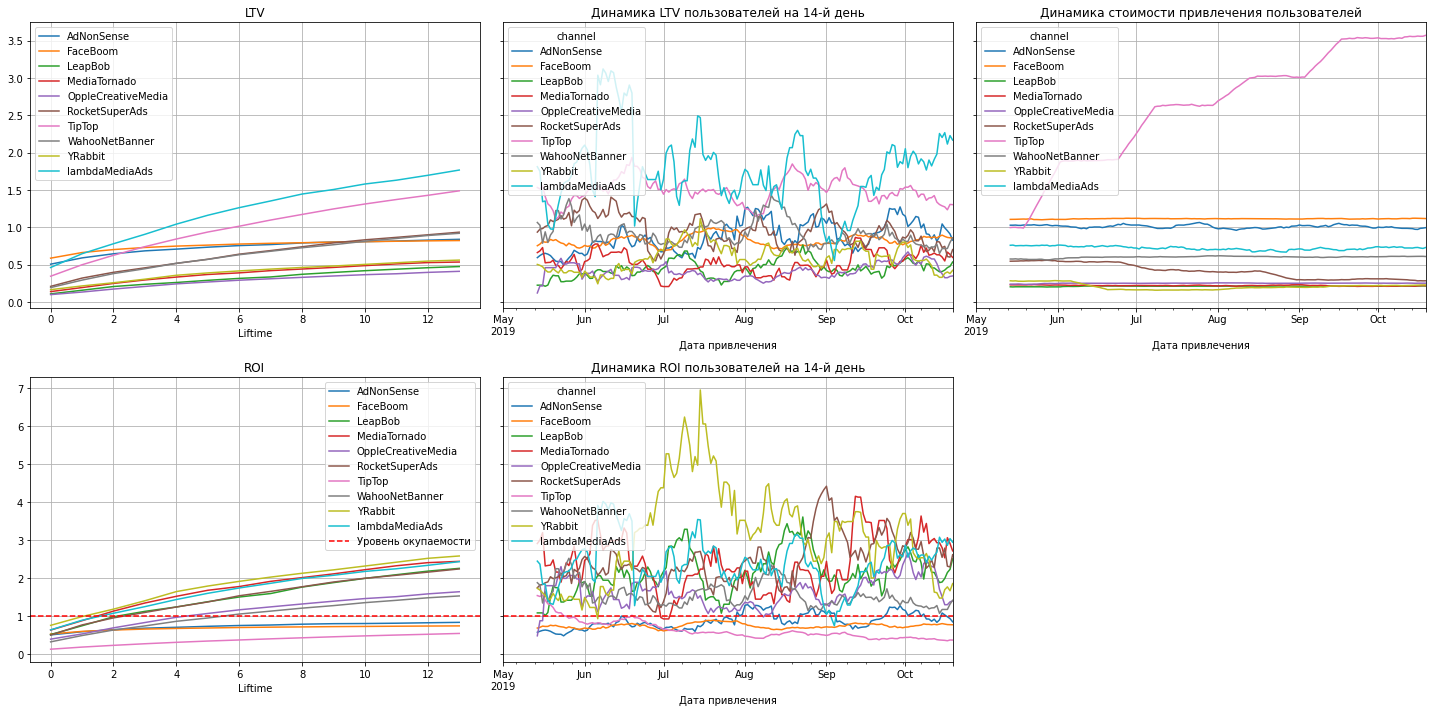

In [ ]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders_data, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Реклама в TipTop, Faceboom, AdNonSense не окупают инвестиции в нее. CAC в TipTop стремительно растет. У YaRabbit наблюдался скачек ROI в июле, интересно разобраться в причине.

Построю график с конверсией пользователей

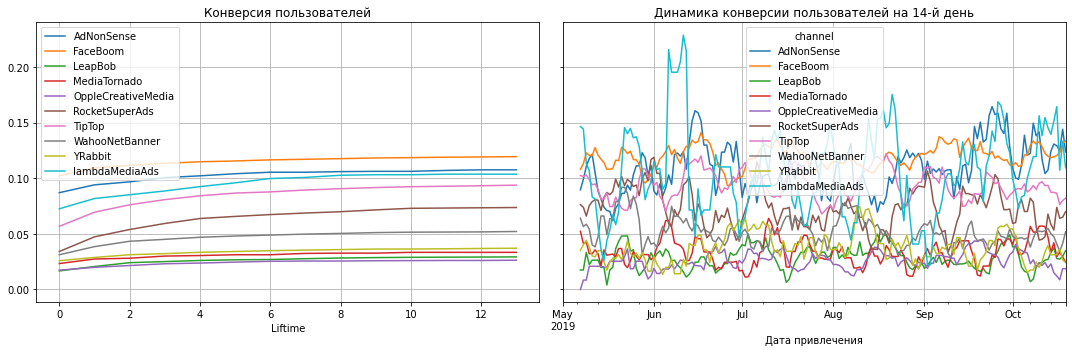

In [ ]:
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders_data, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пользователй из всех каналов достаточно стабильна. Лучшая конверсия пользователей Faceboom, AdNoSense и IambdaMediaAds. Самая низкая - OppleCreativeMedia

Построю график с удержанием пользователей

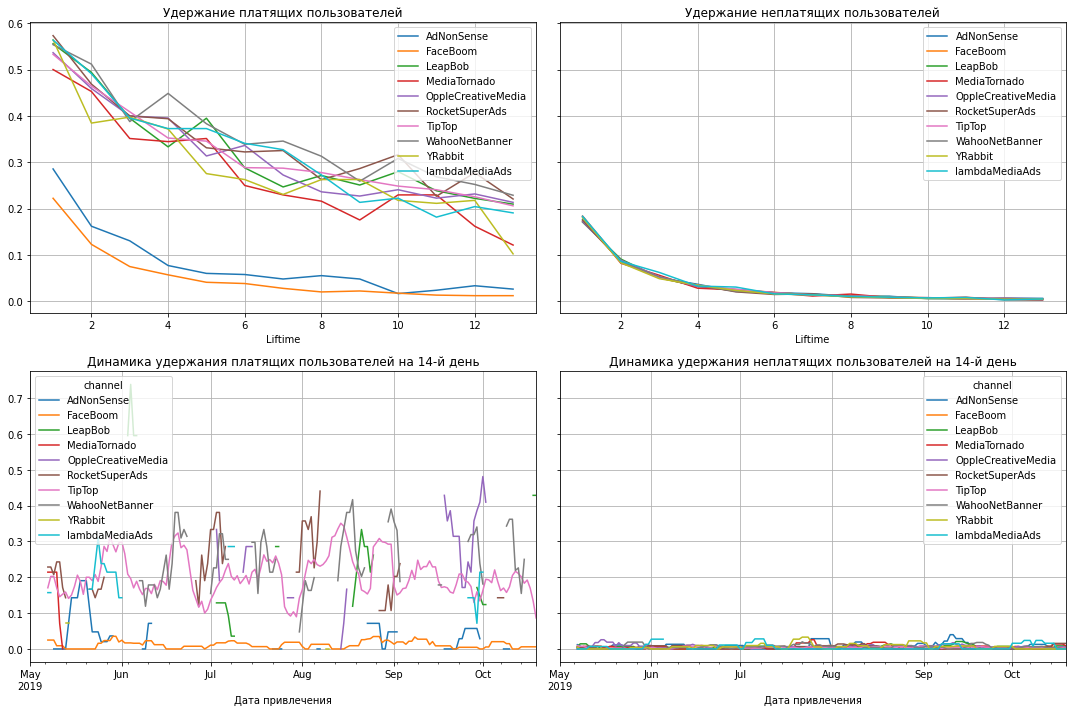

In [ ]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits_data, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Пользователи Faceboom и AdNonSense стабильно плохо удерживаются

**Вывод**

Инвестиции в рекламу перестали окупаться с середины июня 2019 года. В общей сложности конверсия и удержание пользователей в течение года стабильны.
Окупаемость рекламы с разбивкой:

* по устройствам
ROI окупается только для PC. CAC по устройствам растет, для Mac и iPhone выше чем для PC

* по странам
ROI не окупается для США. CAC для США сильно выше, чем для других стран;
Конверсия США лучше, удержание хуже по сравнению с другими странами;
CAC для США растет, для всех остальных стран падает

* по каналам
ROI не окупается для TipTop, Faceboom, AdNonSense;
CAC для TipTop стремительно растет, для остальных равномерен и на низком уровне;
Удержание Faceboom и AdNonSense хуже по сравнению с другими каналами


### Общий вывод



**Цель проекта** - разобраться в причинах, почему несмотря на огромные вложения в рекламу развлекательного приложения Procrastinate Pro+ компания последние несколько месяцев терпит убытки.



Были даны выгрузки с данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

* файл с логами сервера с данными об их посещениях,

* файл с выгрузкой их покупок за этот период,

* файл с рекламными расходами.

**Проведена предобработка данных**

* Названия столбцов приведены к змеиному регистру
* Изменены типы данных для дат
* Дубли не обнаружены

**Заданы функции для расчёта и анализа LTV, ROI, удержания и конверсии**

* для вычисления значений метрик
* для построения графиков

**Проведен исследовательский анализ данных**

Выявленя самая высокая доля платящих пользователей:
* в США - 6.9%
* использует Mac - 6.36%
* приходит с Faceboom - 12.21%

**Проанализированы расходы на маркетинг**

Инвестиции в рекламу перестали окупаться с середины июня 2019 года при том, что конверсия и удержание пользователей в течение года показывали стабильность.


Окупаемость рекламы с разбивкой:

* по устройствам
ROI окупается только для PC. CAC по устройствам растет, для Mac и iPhone выше чем для PC

* по странам
ROI не окупается для США. CAC для США сильно выше, чем для других стран;
Конверсия США лучше, удержание хуже по сравнению с другими странами;
CAC для США растет, для всех остальных стран падает

* по каналам
ROI не окупается для TipTop, Faceboom, AdNonSense;
CAC для TipTop стремительно растет, для остальных равномерен и на низком уровне;
Удержание Faceboom и AdNonSense хуже по сравнению с другими каналами

**Вывод**

* Снижать CAC для Mac и iPhone
* Снижать CAC для США, разобраться почему плохое удержание
* Снижать CAC для TipTop, разобраться почему плохое удержание у Faceboom и AdNonSense

Самая высокая доля платящих пользователей в США, поэтому важно разобраться как успешно работать на этом рынке:
    
* Стоит изучить медиапотребеление в разных странах, особенно в США, например с помощью MediaScope, Nielsen. Насколько совпадает медиаплан Procrastinate Pro+ с данными от исследовательских компаний? Верно ли выбрали каналы и устройства?
* Проанализировать данные в разрезе устройств, каналов только на рынке США
* Дополнительно для рынка США посомтреть срезы по версиям операционных систем, версиям самих устройств, штатам, крупным городам, возрасту, интересам, профессиям и т.д.
* Проверить какая выбрана стратегия в рекламном кабинете (узнаваемость, трафик, конверсия), некоторые стратегии доступны только после обращения в поддержку. Выставлены ли лимиты на цену? Используется ли сегемнт look-a-like на уже платящих пользователей?
* Заявленное УТП в креативах соответсвует реальности?
* Какая локализация в продукте? Есть деление на британский и американский английский?
* На каком действии происходит отток клиентов?
* Что показывают исследования пользователей?
* Есть ли конкуренты в США, которых нет в Европе?
* Что могло произойти в мае 2019? Уход сотрудника, смена законодательства, например, в областе персональных данных, обновление рекламного кабинета, выход обновления в приложении?
    
Точно такой же анализ проводится по каждой стране/городу. На основании полученных данных перераспределяются бюджеты в медиаплане.
    
    
Исходя из тех данных, которые есть стоит снизить бюджет у TipTop, Faceboom, AdNonSense впользу других каналов. Анализ настроек рекламной камапнии YaRabbit в июле может помочь выбрать успешную стратегию продвижения в других каналах. Возможно была найдена  связка креатива с целевой аудиторией, обычно именно это определяет успех рекламы.



    
</div>